<a href="https://colab.research.google.com/github/Sun0rise/study_project/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%A1%D0%BA%D0%B2%D0%B0%D0%B6_%D0%B4%D0%BE%D0%B1%D1%8B%D1%87%D0%B0_%D0%AD%D0%A6%D0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib as mpl
import math
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
D_casing = 0.168 #м
P_formation = 12.9 #МПа
H_w = 1757 #м
gradP = 22 #атм/м
K_prod = 16.16 #т/(сут*атм)
rho_od = 848 #кг/м^3
rho_of = 790 #кг/м^3
rho_w = 1169 #кг/м^3
beta_w = 0.25
mu_od = 9.2 #мПа*с
P_surface = 1.1 #МПа
mu_of = 3.6 #мПа*с
T_formation = 353 #K
P_sat = 8.5 #МПа
W = 0.0197 #K/м
G_0 = 88  #м^3/м^3
rho_g0 = 1.448 #кг/м^3
L_well = 1760 #м
y_n = 0.036
y_m = 0.367

P_0 = 0.1
T_0 = 273
rho_w_st = 1000
g = 9.81
beta = 0.08
rho_n = 0.97

# **2.2 Определение дебита и забойного давления**

Оценка забойного давления ($P_{заб} \geq 0.75 P_{нас}$)

In [ ]:
P_bh1 = 0.75 * P_sat
P_bh2 = rho_w_st * g * H_w * 10 ** (-6) - gradP * (L_well - H_w) * 0.1
P_bh = max(P_bh1, P_bh2)
print("P_заб1 =", P_bh1, "МПа")
print("P_заб2 =", P_bh2, "МПа")
print("P_заб =", P_bh, "МПа")

P_заб1 = 6.375 МПа
P_заб2 = 10.636169999999996 МПа
P_заб = 10.636169999999996 МПа


Расчет массового дебита по жидкости, плотности жидкости при стандартных условиях и объемного дебита по жидкости

In [ ]:
Q_m = K_prod * (P_formation - P_bh) #т/сут
rho_l0 = rho_od * (1 - beta_w) + rho_w * beta_w #кг/м^3
Q = Q_m / (rho_l0 + G_0 * rho_g0) * 1000 #м^3/сут
Q_m, rho_l0, Q

(36.583492800000066, 928.25, 34.6541572493024)

Дебит по нефти


In [ ]:
Q_o = Q * (1 - beta_w)
"Q_н = ", Q_o

('Q_н = ', 25.9906179369768)

# **2.3 Определение диаметра НКТ**

In [ ]:
d_casing = 0.1321
D_tub = 0.0483
d_tub = 0.0403

# **2.4 Определение давления на приеме насоса**

Давление на приеме насоса

In [ ]:
P_pump = 0.5 + 0.3 * P_sat * (1 - beta_w)
P_pump

NameError: name 'P_sat' is not defined

# **2.5 Определение глубины спуска насоса**

1-2. Расчет градиентного потока в НКТ. Определение температуры на устье скважины при движении по НКТ.

In [ ]:
W_flow = (3.4 * 10 ** (-3) + 0.79 * W) / (10 ** (Q / (86400 * 20 * d_tub ** 2.67)))
T_surface = T_formation - W_flow * L_well

W_flow, T_surface

(0.014849983359443156, 326.86402928738005)

Определение дискритизации давлений, меньших давления насыщения. (следующие расчеты приведены для давлений, меньших давления насыщения)

In [ ]:
delta_P = 0.1 * P_sat
N = int((P_sat - P_surface) / delta_P)

In [ ]:
P = np.array([P_surface + delta_P * i for i in range(N + 1)] + [P_sat])
P

array([1.1 , 1.95, 2.8 , 3.65, 4.5 , 5.35, 6.2 , 7.05, 7.9 , 8.5 ])

3. Определние температуры потока, соответствующую заданным давлениям

In [ ]:
T = T_surface + (T_formation - T_surface) * (P - P_surface) / (P_bh - P_surface)
T

array([326.86402929, 329.19364119, 331.52325309, 333.85286499,
       336.18247688, 338.51208878, 340.84170068, 343.17131258,
       345.50092448, 347.14535641])

4-5. Определение относительной плотности газа по воздуху и относительной плотности смеси углеводовородной части газа при стандартных условиях

In [ ]:
rho_g  = rho_g0 / 1.293
rho_gc = (rho_g - rho_n * y_n) / (1 - y_n)
rho_g, rho_gc

(1.119876256767208, 1.125473295401668)

6. Определение значения приведенных давления и температуры по формулам Ляпкова

In [ ]:
P_ps = 10 * P / (46.9 - 2.06 * rho_gc ** 2)
T_ps = T / (97 + 172 * rho_gc ** 2)
P_ps, T_ps

(array([0.24835959, 0.44027383, 0.63218806, 0.82410229, 1.01601652,
        1.20793075, 1.39984499, 1.59175922, 1.78367345, 1.91914232]),
 array([1.03808968, 1.04548831, 1.05288694, 1.06028557, 1.0676842 ,
        1.07508283, 1.08248146, 1.08988009, 1.09727873, 1.10250129]))

7. Расчет коэффициента сжимаемости нефтяного газа

In [ ]:
z_n = 1 + 0.564 * 10 ** (-10) * (T - 273) ** 3.71 * P ** (14.7 * (T - 273) ** (-0.5))
z_c = 1 - P_ps * (0.18 / (T_ps - 0.73) - 0.135) + 0.016 * P_ps ** 3.45 / T_ps ** 6.1
z = z_n * y_n + z_c * (1 - y_n)
z_c, z_n, z

(array([0.88852984, 0.80896097, 0.73532075, 0.66787561, 0.60691747,
        0.5527382 , 0.505614  , 0.46579565, 0.43350255, 0.41533992]),
 array([1.00018084, 1.0006477 , 1.00146997, 1.00269498, 1.00436025,
        1.006496  , 1.00912695, 1.01227347, 1.01595261, 1.01887824]),
 array([0.89254927, 0.81586169, 0.74490212, 0.67992911, 0.62122541,
        0.56907348, 0.52374046, 0.48546885, 0.45447075, 0.4370673 ]))

8. Расчет равновесного значения $P_{нас T}$

In [ ]:
P_satT = P_sat - (T_formation - T) / (9.157 + 701.8 / (G_0 * (y_m - 0.8 * y_n)))
P_satT

array([7.70165578, 7.77281565, 7.84397551, 7.91513538, 7.98629525,
       8.05745511, 8.12861498, 8.19977485, 8.27093471, 8.32116521])

9. Расчет вспомагательных коэффициентов для нахождения приведенного к стандартным условиям объема выделевшегося газа

In [ ]:
R = (1 + np.log10(P)) / (1 + np.log10(P_satT)) - 1
M = 1 + 0.029 * (T - 293) * (rho_od * rho_g * 10 ** (-3) - 0.7966)
D = 10 ** (-3) * rho_od * rho_g * (4.5 - 0.003 * (T - 293)) - 4.785
R, M, D

(array([-0.44800092, -0.31765081, -0.23614127, -0.17707288, -0.13096089,
        -0.09329782, -0.06158316, -0.03428401, -0.01039214,  0.00480932]),
 array([1.15030878, 1.16064898, 1.17098919, 1.1813294 , 1.19166961,
        1.20200982, 1.21235002, 1.22269023, 1.23303044, 1.24032941]),
 array([-0.60802965, -0.61466663, -0.62130361, -0.62794059, -0.63457758,
        -0.64121456, -0.64785154, -0.65448853, -0.66112551, -0.66581044]))

10. Нахождение приведенного к нормальным условиям удельного объема выделевшегося из нефти газа

In [ ]:
V_gas_lib = G_0 * R * M * (D * (1 + R) - 1)
V_gas_lib[-1] = 0
V_gas_lib

array([60.57072404, 46.05148354, 35.88212955, 27.92026569, 21.30709839,
       15.60635055, 10.56444133,  6.02038462,  1.86536593,  0.        ])

11. Расчет остаточной газонасыщенности нефти в процессе разгазирования

In [ ]:
V_gas_disp = G_0 * M  - V_gas_lib
V_gas_disp

array([ 40.65644822,  56.08562704,  67.16491935,  76.03672152,
        83.55982715,  90.1705133 ,  96.12236084, 101.57635587,
       106.64131288, 109.14898821])

12. Расчет вспомагательных коэффициентов для нахождения относительной плотности выделевшегося газа

In [ ]:
U = 10 ** (-3) * rho_od * G_0 - 186
a = 1 + 0.0054 * (T - 293)
U, a

(-111.376,
 array([1.18286576, 1.19544566, 1.20802557, 1.22060547, 1.23318538,
        1.24576528, 1.25834518, 1.27092509, 1.28350499, 1.29238492]))

13. Определение относительной плотности выделевшегося из нефти газа

In [ ]:
rho_gas_lib = a * (rho_g - 0.0036 * (1 + R) * (105.7 + U * R))
rho_gas_lib

array([0.95892006, 0.92446508, 0.91434162, 0.91339109, 0.91694351,
       0.92303725, 0.93069538, 0.93937503, 0.94875047, 0.95567187])

14. Расчет значения относительной плотности нефтяного газа, остающегося в нефти

In [ ]:
rho_gas_disp = (G_0 * (a * M * rho_g - rho_gas_lib / G_0)) / V_gas_disp
rho_gas_disp

array([3.27458505, 2.42150659, 2.06196541, 1.85684269, 1.72218949,
       1.6263252 , 1.55438728, 1.49838795, 1.45361248, 1.43855553])

15. Расчет температурного коэффициента объемного расширения дегазированной нефти пр стандартном давлении

In [ ]:
a_o = np.where(rho_od < 860,
               10 ** (-3) * (3.083 - 2.683 * 10 ** (-3) * rho_od),
               10 ** (-3) * (2.513 - 1.975 * 10 ** (-3) * rho_od))
a_o

array(0.00080782)

16. Удельное приращение объема нефти за счет единичного изменения ее газонасыщенности

In [ ]:
lambda_T = (10 ** (-3) * (4.3 - 3.54 * 10 ** (-3) * rho_od + 1.0337 * rho_gas_disp / a +
                         5.581 * 10 ** (-6) * rho_od * (1 - 1.61 * 10 ** (-6) * rho_od * V_gas_disp) * V_gas_disp))
lambda_T

array([0.00434146, 0.00363706, 0.00335121, 0.00319309, 0.00309203,
       0.00302177, 0.00297019, 0.00293085, 0.0029    , 0.00288828])

17. Расчет ряда значений объемного коэффициента нефти

In [ ]:
b_o = 1 + 1.0733 * 10 ** (-3) * rho_od * V_gas_disp * lambda_T / M + a_o * (T - 293) - 6.5 * 10 ** (-4) * P
b_o

array([1.16629941, 1.18793294, 1.20424757, 1.21768915, 1.22929256,
       1.23960487, 1.24895438, 1.25755516, 1.2655553 , 1.26954842])

18. Вычисление удельного объема ГЖС при определенных термодинамичнских условиях

In [ ]:
V_mix = b_o + V_gas_lib * z * P_0 * T / (T_0 * P) + beta_w / (1 - beta_w)
V_mix

array([7.38409477, 3.84461471, 2.6968139 , 2.18706007, 1.92484673,
       1.7787771 , 1.69370717, 1.64300134, 1.61246957, 1.60288175])

19. Определение удельной массы смеси при стандартных условиях

In [ ]:
M_mix = rho_od + rho_g0 * G_0 + rho_w * beta_w / (1 - beta_w)
M_mix

1365.0906666666667

20. Расчет идеальной плотности ГЖС

In [ ]:
rho_mix = M_mix / V_mix
rho_mix

array([184.8690611 , 355.06566171, 506.18645384, 624.16697576,
       709.19447456, 767.43211065, 805.97797019, 830.85182715,
       846.58383355, 851.64776757])

21. Расчет корреляционного коэффициента необратимых потерь давления

In [ ]:
f = (10 **
    (19.66 * (1 + np.log10(0.99 * 10 ** (-5) * Q * (1 - beta_w) * M_mix / d_tub)) ** (-0.25) - 17.23))
f

0.26775061455461757

22. Вычисляем полный градиент давления в точках с заданными давлениями, меньшими давления насыщения

In [ ]:
dP_dH_not_sat = (rho_mix * g * 10 ** (-6) +
          (f * Q ** 2 * (1 - beta_w) * M_mix ** 2) / (2.3 * 10 ** 15 * rho_mix * d_tub ** 5))
dP_dH_not_sat

array([0.01175635, 0.00866002, 0.00859699, 0.00906798, 0.00954903,
       0.00992366, 0.01018724, 0.01036298, 0.0104762 , 0.01051297])

$P > P_{нас}$

23. Рассчитываем приведенную скорость жидкости в сечении эксплуатационной колонны

In [ ]:
b_o_sat = float(b_o[-1])

w_l = Q * b_o_sat/ (math.pi * d_tub ** 2 * 0.25 * 86400)
b_o_sat, w_l

(1.269548419714956, 0.39920033295977336)

24. Вычисляем число Рейнольдса однофазного потока

In [ ]:
rho_ow = rho_od * (1 - beta_w) + rho_w * beta_w

Re_l = w_l * rho_ow * d_tub / (mu_of * 10 ** (-3))
rho_ow, Re_l

(928.25, 4148.18768764371)

25. Коэффициент гидравлического сопротивления потока жидкости

In [ ]:
eps = 1.4 * 10 ** (-5)

lambda_res = 0.067 * (158 / Re_l + 2 * eps / d_tub)
lambda_res

0.002598508686483048

26. Рассчитываем градиенты давления, где P > Pнас

In [ ]:
dP_dH_sat = rho_ow * g * 10 ** (-6) + (lambda_res * w_l ** 2 * 10 ** (-6)) / (2 * d_tub)
dP_dH_sat

0.009106137637725782

27. Вычисляем $\frac{dH}{dP}=\frac{1}{\frac{dH}{dP}}$

In [ ]:
dH_dP_not_sat = 1 / dP_dH_not_sat
dH_dP_sat = 1 / dP_dH_sat
H_bh = L_well
dH_dP_not_sat, dH_dP_sat

(array([ 85.0603995 , 115.47315517, 116.31982733, 110.27808398,
        104.72267039, 100.76930136,  98.16197396,  96.49733366,
         95.45445726,  95.12062377]),
 109.81604273771394)

In [ ]:
H = np.array([0 for i in range(0, np.size(dH_dP_not_sat) + 2)])
H[0] = delta_P * dH_dP_not_sat[0] / 2
H[1] = delta_P * ((dH_dP_not_sat[0] + dH_dP_not_sat[1]) / 2)
for i in range(2, np.size(dH_dP_not_sat)):
    H[i] = H[i - 1] + delta_P * ((dH_dP_not_sat[i - 1] + dH_dP_not_sat[i]) / 2)
H[-1] = H[-3] + dH_dP_sat * (P_bh - P_sat)
H[-2] = L_well
H

array([  36,   85,  183,  279,  370,  457,  541,  623,  704,  784, 1760,
       1018])

In [ ]:
H = np.array([0 for i in range(0, np.size(dH_dP_not_sat) + 1)])
H[-1] = H_bh + (P_sat - P_bh) * dH_dP_sat
for i in range(np.size(dH_dP_not_sat) - 1, -1, -1):
    H[i] = H[i + 1] - delta_P * ((dH_dP_not_sat[i - 1] + dH_dP_not_sat[i]) / 2)
H, np.append(P, np.array(P_bh))

(array([ 655,  732,  818,  917, 1014, 1106, 1194, 1279, 1362, 1444, 1525]),
 array([ 1.1    ,  1.95   ,  2.8    ,  3.65   ,  4.5    ,  5.35   ,
         6.2    ,  7.05   ,  7.9    ,  8.5    , 10.63617]))

29. Изменение газосодержания:

In [ ]:
N_g__ = (V_gas_lib * (1 - beta_w) * 0.1 * T * z) / (P * 293)
N_g = N_g__ / (1 + N_g__)
N_g

array([0.80438545, 0.61883977, 0.44753773, 0.3077029 , 0.20199304,
       0.12575288, 0.07223618, 0.03513716, 0.00940121, 0.        ])

Text(0.5, 750, '$H_{сп}$')

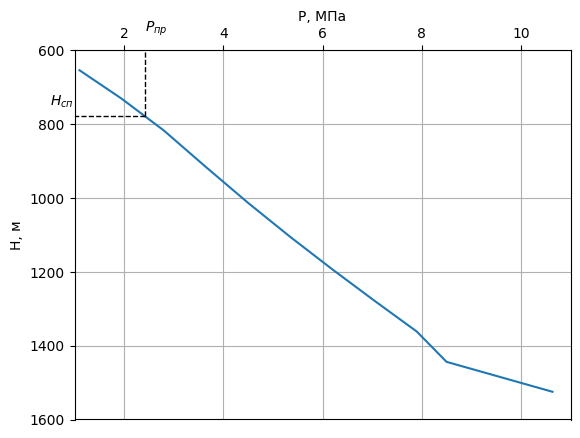

In [ ]:
fig, ax = plt.subplots(1, 1)  # Create a figure containing a single axes.
ax.plot(np.append(P, np.array(P_bh)), H)  # Plot some data on the axes.
ax.grid()
ax.invert_yaxis()
ax.set_ylabel('Н, м')
ax.set_xlabel('P, МПа')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim(1, 11)
ax.set_ylim(1600, 600)

ax.plot([P_pump, P_pump], [780, 600], color='black', linewidth=1, linestyle='--')
ax.plot([P_pump, 1], [780, 780], color='black', linewidth=1, linestyle='--')

ax.text(P_pump, 550, r'$P_{пр}$')
ax.text(0.5, 750, r'$H_{сп}$')

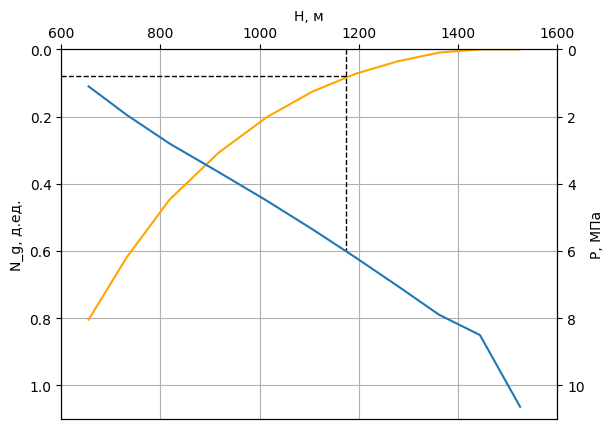

In [ ]:
fig, ax = plt.subplots(1, 1)  # Create a figure containing a single axes.
ax.plot(H, np.append(N_g, 0), color='orange')  # Plot some data on the axes.
ax1 = ax.twinx()
ax1.plot(H, np.append(P, np.array(P_bh)))
ax.grid()
ax.invert_yaxis()
ax1.invert_yaxis()
ax1.set_ylabel('P, МПа')
ax.set_xlabel('Н, м')
ax.set_ylabel('N_g, д.ед.')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim(600, 1600)
ax.set_ylim(1.1, 0)
ax1.set_ylim(11, 0)

ax.plot([1175, 1175], [0, 0.6], color='black', linewidth=1, linestyle='--')
ax.plot([600, 1175], [beta, beta], color='black', linewidth=1, linestyle='--')

#ax.text(750, 50, r'$G$')
#ax1.text(1000, 4, r'$P$')

In [ ]:
L_pump = 1175

# **2.6 Подбор ЭЦН**

In [ ]:
Q_w_opt_pump = 30
Q_w_pump = np.array([20, 25, 30, 35, 40])
H_w = np.array([4.52, 4.35, 4.10, 3.74, 3.28])
mu_em = mu_of * (1 + 2.9 * beta_w) / (1 - beta_w)

Расчет коэффициента $K_{H, Q}$

In [ ]:
H_din = L_well - (P_formation * 10 ** 6 - Q_m / K_prod * 10 ** 5) / (rho_mix[-1] * g)

omega = 4 * Q / (math.pi * d_tub ** 2 * 86400)
Re = omega * d_tub * rho_mix[-1] / mu_em * 10 ** 3
lambda_p = 0.3164 / Re ** 0.25
h_fr = lambda_p * L_pump * omega ** 2 / (2 * g * d_tub)

H_g = 4 * d_tub * G_0 * (1 - (P_surface / P_sat) ** (1 / 3)) * (1 - beta_w)

H_well = H_din + P_surface * 10** 6 / (np.mean(rho_mix) * g) + h_fr - H_g
H_din, h_fr, H_g, H_well, lambda_p, Re, omega

(243.04897839119553,
 7.737211286573893,
 5.2577386417366245,
 418.51655952131443,
 0.05265836712334186,
 1303.3958903537084,
 0.31444277883422783)

In [ ]:
Q_l_pump = np.array([35, 40, 50, 60, 70, 80])
Q_opt = 50
z_n = 145
H_l_pump = np.array([3.94, 3.93, 3.88, 3.75, 3.51, 3.15]) * z_n
Q_l_pump_0, H_l_pump_0 = Q_l_pump, H_l_pump
H_w_opt = 640

n_s = 193 * 50 * Q_opt ** 0.5 * (g * H_w_opt / z_n) ** (-0.75)
n_s

4042.5144518138877

In [ ]:
Re_o = (4.3 + 0.816 * n_s ** 0.274) / n_s ** 0.575 * Q_l_pump * rho_mix[-1] / mu_em * (50 / Q_opt) ** (-0.75)
Re_o, Q_l_pump

(array([371.80419325, 424.919078  , 531.14884749, 637.37861699,
        743.60838649, 849.83815599]),
 array([35, 40, 50, 60, 70, 80]))

In [ ]:
K_HQ = Re_o / (Re_o - 50 + 200 * Q_l_pump / Q_opt)
K_HQ

array([0.80511221, 0.79436142, 0.77978382, 0.77035906, 0.76376539,
       0.75889373])

In [ ]:
Q_l_pump = Q_l_pump_0 * K_HQ
H_l_pump = H_l_pump_0 * K_HQ
Q_l_pump, H_l_pump

(array([28.17892725, 31.77445677, 38.98919079, 46.22154384, 53.46357712,
        60.71149846]),
 array([459.96060388, 452.66685478, 438.70637482, 418.88274107,
        388.71839392, 346.6247115 ]))

Повторение расчетов

In [ ]:
for i in range(5):
    Re_o = (4.3 + 0.816 * n_s ** 0.274) / n_s ** 0.575 * Q_l_pump * rho_mix[-1] / mu_em * (50 / Q_opt) ** (-0.75)
    K_HQ = Re_o / (Re_o - 50 + 200 * Q_l_pump / Q_opt)
    Q_l_pump = Q_l_pump_0 * K_HQ
    H_l_pump = H_l_pump_0 * K_HQ

Q_l_pump, H_l_pump

(array([28.84533248, 32.47760813, 39.74217647, 47.00675205, 54.27132968,
        61.53590802]),
 array([470.8382413 , 462.68412483, 447.17896964, 425.99869043,
        394.59133202, 351.33157487]))

Text(0, 0.5, 'H, м')

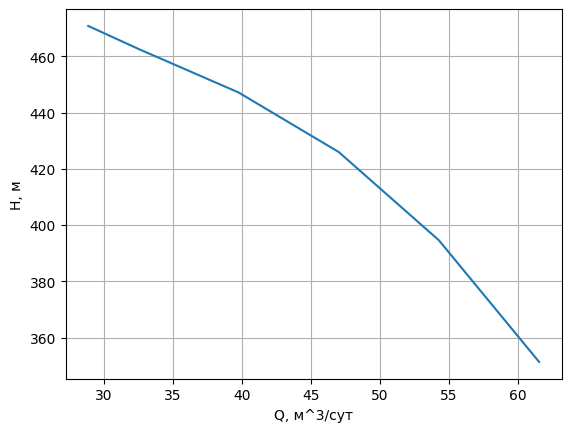

In [ ]:
fig, ax = plt.subplots(1, 1)  # Create a figure containing a single axes.
ax.plot(Q_l_pump, H_l_pump)  # Plot some data on the axes.
ax.grid()
ax.set_xlabel('Q, м^3/сут')
ax.set_ylabel('H, м')
#ax.set_xlim(25, 65)
#ax.set_ylim(1900, 2600)

#ax.plot([P_pump, P_pump], [780, 600], color='black', linewidth=1, linestyle='--')
#ax.plot([P_pump, 1], [780, 780], color='black', linewidth=1, linestyle='--')

#ax.text(P_pump, 550, r'$P_{пр}$')
#ax.text(0.5, 750, r'$H_{сп}$')

In [ ]:
H_pump = pd.DataFrame({'Q': Q_l_pump, 'H': H_l_pump})
H_pump

,Q,H
0,28.845332,470.838241
1,32.477608,462.684125
2,39.742176,447.178970
3,47.006752,425.998690
4,54.271330,394.591332
5,61.535908,351.331575


# **2.7. Подбор погружного электродвигателя**

Параметры ПЭД

In [ ]:
D_el = 0.117
N = 63
U = 2000
I = 25.5
KPD = 0.86
cos_phi = 0.84
i = 5

Расчет скорости потока откачиваемой жидкости

In [ ]:
F = 0.785 * (d_casing ** 2 - D_el ** 2)
W = Q / (86400 * F)
F, W, d_casing

(0.0029527068499999986, 0.13583799657525678, 0.1321)

# **2.8 Подбор кабеля, трансформатора и станции управления**

**Выбор кабеля**

1. Определение сечения жилы кабеля

In [ ]:
S = I / i
S

5.1

2. Определение потери мощности

In [ ]:
rho_cup = 0.0175
alphaT = 0.004
T_pump = 330

In [ ]:
R = rho_cup * (1 + alphaT + (T_pump - 293)) / S
R

0.1304058823529412

3. Определение общей длины кабеля

In [ ]:
L_k = L_pump + 100
L_k

1275

In [ ]:
delta_P_k = 3 * I ** 2 * R * L_k * 10 ** (-3)
delta_P_k

324.3463256250001

**Выбор трансформатора**

1. Мощность трансформатора

In [ ]:
P_trans = delta_P_k + N / KPD
P_trans

397.60213957848845

2. Величина падения напряжения на кабеле

In [ ]:
R_k = R * 1000
R_k

130.4058823529412

In [ ]:
X_0 = 0.1 * 10 ** (-3)
sin_phi = (1 - cos_phi ** 2) ** 0.5
delta_U = 3 ** 0.5 *(R * cos_phi + X_0 * sin_phi) * I * L_k
delta_U

6171.667571974932

In [ ]:
U_tr = U + delta_U
U_tr

8171.667571974932